# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file =  "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_rgb, y_train = train['features'], train['labels']
X_valid_rgb, y_valid = valid['features'], valid['labels']
X_test_rgb, y_test = test['features'], test['labels']

print("Training, validation, and testing data loaded.")

Training, validation, and testing data loaded.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_rgb)

# TODO: Number of validation examples
n_validation = len(X_valid_rgb)

# TODO: Number of testing examples.
n_test = len(X_test_rgb)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_rgb[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

sign class:  0  count:   180
sign class:  1  count:  1980
sign class:  2  count:  2010
sign class:  3  count:  1260
sign class:  4  count:  1770
sign class:  5  count:  1650
sign class:  6  count:   360
sign class:  7  count:  1290
sign class:  8  count:  1260
sign class:  9  count:  1320
sign class: 10  count:  1800
sign class: 11  count:  1170
sign class: 12  count:  1890
sign class: 13  count:  1920
sign class: 14  count:   690
sign class: 15  count:   540
sign class: 16  count:   360
sign class: 17  count:   990
sign class: 18  count:  1080
sign class: 19  count:   180
sign class: 20  count:   300
sign class: 21  count:   270
sign class: 22  count:   330
sign class: 23  count:   450
sign class: 24  count:   240
sign class: 25  count:  1350
sign class: 26  count:   540
sign class: 27  count:   210
sign class: 28  count:   480
sign class: 29  count:   240
sign class: 30  count:   390
sign class: 31  count:   690
sign class: 32  count:   210
sign class: 33  count:   599
sign class: 34

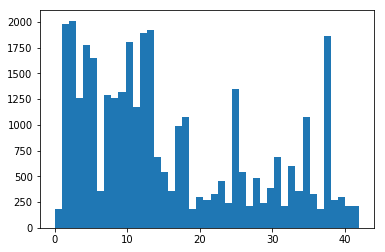

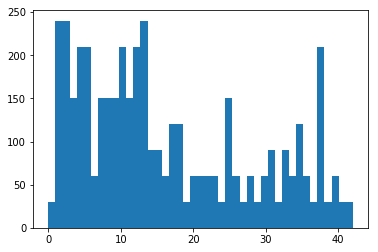

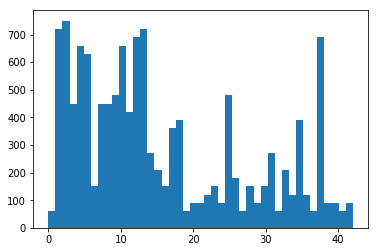

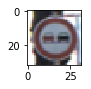

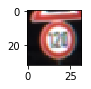

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure()
plt.hist(y_train,n_classes)
plt.figure()
plt.hist(y_valid,n_classes)
plt.figure()
plt.hist(y_test,n_classes)

from collections import Counter
counts = Counter(y_train)
for sign_class_number in range(n_classes):
    print("sign class: {:2d}  count: {:5d}".format(sign_class_number, counts[sign_class_number]))

for x in range(2):
    index = random.randint(0, len(X_train_rgb))
    image = X_train_rgb[index]
   
    print("index:", index, "shape: ", X_train_rgb[index].shape, "squeezed:", X_train_rgb[index].squeeze().shape)

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

shape of X_train_actual: (34799, 32, 32, 1)
color depth: 1
sign class:  0  count:   180
creating 820 extra images for class 0


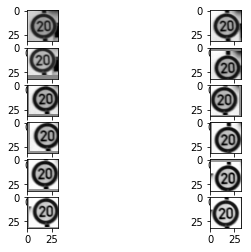

sign class:  1  count:  1980
sign class:  2  count:  2010
sign class:  3  count:  1260
sign class:  4  count:  1770
sign class:  5  count:  1650
sign class:  6  count:   360
creating 640 extra images for class 6


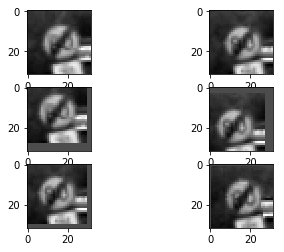

sign class:  7  count:  1290
sign class:  8  count:  1260
sign class:  9  count:  1320
sign class: 10  count:  1800
sign class: 11  count:  1170
sign class: 12  count:  1890
sign class: 13  count:  1920
sign class: 14  count:   690
creating 310 extra images for class 14


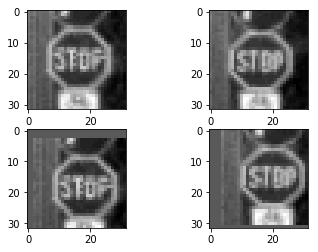

sign class: 15  count:   540
creating 460 extra images for class 15


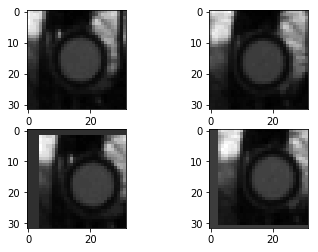

sign class: 16  count:   360
creating 640 extra images for class 16


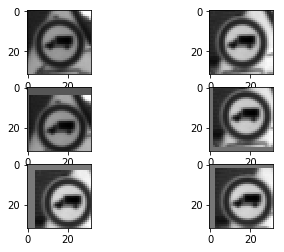

sign class: 17  count:   990
creating 10 extra images for class 17


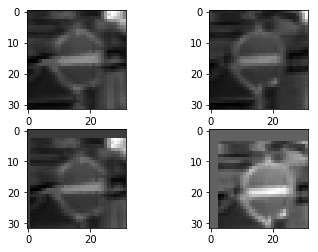

sign class: 18  count:  1080
sign class: 19  count:   180
creating 820 extra images for class 19


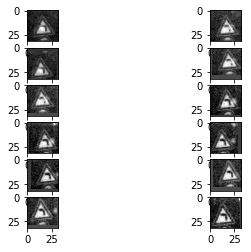

sign class: 20  count:   300
creating 700 extra images for class 20


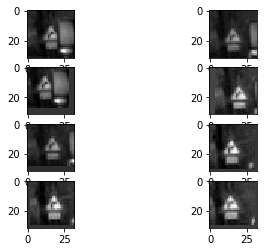

sign class: 21  count:   270
creating 730 extra images for class 21


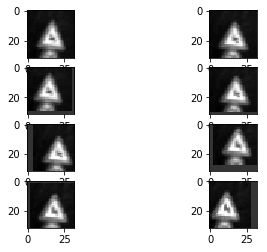

sign class: 22  count:   330
creating 670 extra images for class 22


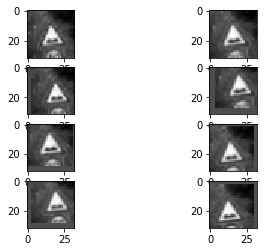

sign class: 23  count:   450
creating 550 extra images for class 23


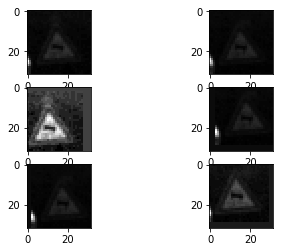

sign class: 24  count:   240
creating 760 extra images for class 24


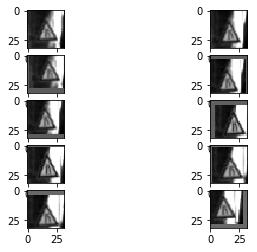

sign class: 25  count:  1350
sign class: 26  count:   540
creating 460 extra images for class 26


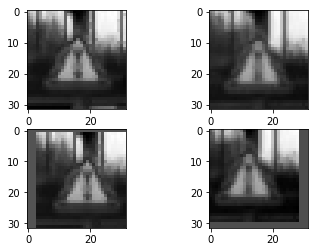

sign class: 27  count:   210
creating 790 extra images for class 27


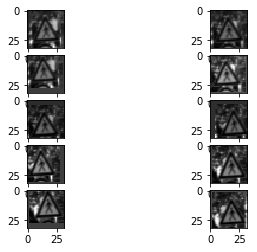

sign class: 28  count:   480
creating 520 extra images for class 28


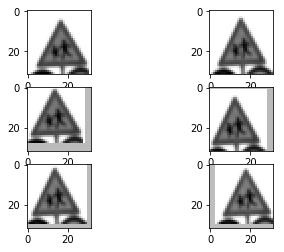

sign class: 29  count:   240
creating 760 extra images for class 29


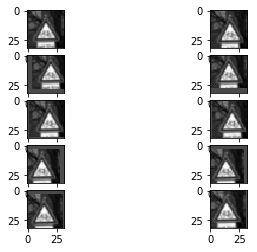

sign class: 30  count:   390
creating 610 extra images for class 30


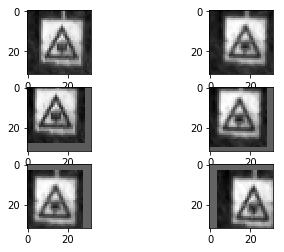

sign class: 31  count:   690
creating 310 extra images for class 31


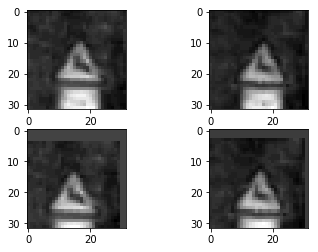

sign class: 32  count:   210
creating 790 extra images for class 32


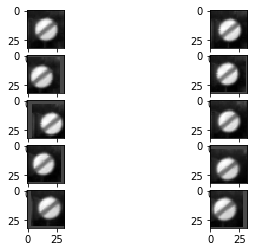

sign class: 33  count:   599
creating 401 extra images for class 33


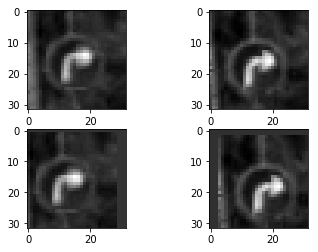

sign class: 34  count:   360
creating 640 extra images for class 34


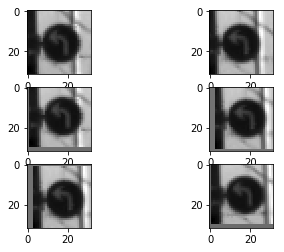

sign class: 35  count:  1080
sign class: 36  count:   330
creating 670 extra images for class 36


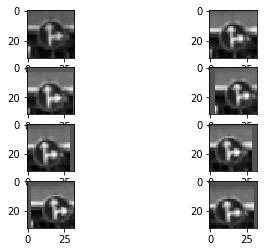

sign class: 37  count:   180
creating 820 extra images for class 37


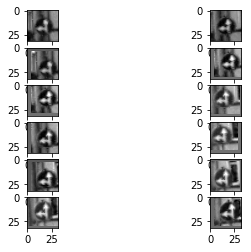

sign class: 38  count:  1860
sign class: 39  count:   270
creating 730 extra images for class 39


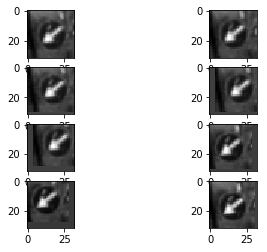

sign class: 40  count:   300
creating 700 extra images for class 40


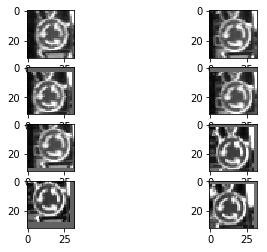

sign class: 41  count:   210
creating 790 extra images for class 41


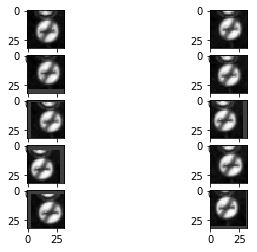

sign class: 42  count:   210
creating 790 extra images for class 42


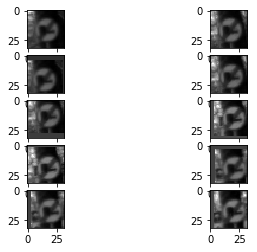

final shape of X_train_actual, y_train: (51690, 32, 32, 1) (51690,)
final hist of y_train:
done


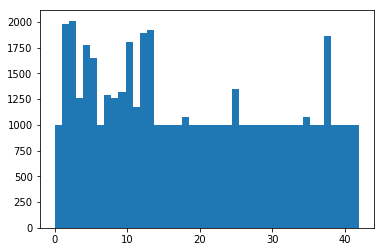

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed

from sklearn.utils import shuffle
import cv2

#X_train_rgb, y_train = shuffle(X_train_rgb, y_train)

g_subplot_cols = 0
g_subplot_rows = 0
g_subplot_current = 0

def subplot_setup(cols, rows):
    global g_subplot_cols
    global g_subplot_rows
    global g_subplot_current
    g_subplot_cols = cols
    g_subplot_rows = rows
    g_subplot_current = 1
    #plt.figure()


def subplot_next(image):
    global g_subplot_cols
    global g_subplot_rows
    global g_subplot_current

    if g_subplot_current == 0:
        print("ERROR: subplot_next called before subplot_setup")
        sys.exit(1)

    if g_subplot_current > (g_subplot_cols * g_subplot_rows):
        print("ERROR: too many subplots for rows, cols:", g_subplot_rows, g_subplot_cols)
        sys.exit(1)

    plt.subplot(g_subplot_rows, g_subplot_cols, g_subplot_current)
    plt.imshow(image.squeeze(), cmap='gray')

    g_subplot_current = g_subplot_current + 1

def modify_image(image):

    possible_offsets = (-4, -3, -2, -1, 1, 2, 3, 4)

    y_offset = random.choice(possible_offsets)
    x_offset = random.choice(possible_offsets)
    modified = np.roll(image, (y_offset, x_offset), axis=(0,1))
    #print("image, shifted shape:", image.shape, modified.shape)

    # np.roll() shifts/wraps pixels around the edge of the image, which results
    # in impossible input data. Cheap (and hacky) solution: gray out the pixels
    # that get wrapped.
    if y_offset > 0:
        clear_y_start = 0
        clear_y_stop = y_offset
    else:
        clear_y_start = y_offset
        clear_y_stop = modified.shape[0]
    if x_offset > 0:
        clear_x_start = 0
        clear_x_stop = x_offset
    else:
        clear_x_start = x_offset
        clear_x_stop = modified.shape[1]

    #print("y, x offset:", y_offset, x_offset)
    #print("clear y start, stop:", clear_y_start, clear_y_stop, "clear x start, stop", clear_x_start, clear_x_stop)

    original_mean_pixel_value = np.mean(modified)

    modified[clear_y_start:clear_y_stop:1,:,:] = original_mean_pixel_value
    modified[:,clear_x_start:clear_x_stop:1,:] = original_mean_pixel_value

    return modified

def blur_image(image):
    possible_kernels = (0,1,3,5)
    kernel_size = random.choice(possible_kernels)

    if kernel_size == 0:
        return image
    
    image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return np.expand_dims(image, axis=3)

def add_extra_images():
    global X_train_actual
    global y_train
    global n_classes
    global counts

    #min_images = 500
    min_images = 1000

    X_train_actual_start_concat_index = n_train

    # Gray problem with class 19, 20

    for sign_class_number in range(n_classes):
        sign_class_counts = counts[sign_class_number]
        print("sign class: {:2d}  count: {:5d}".format(sign_class_number, sign_class_counts))
        if sign_class_counts < min_images:

            image_count_to_create = min_images - sign_class_counts
            new_images = np.empty((image_count_to_create, X_train_actual.shape[1], X_train_actual.shape[2], X_train_actual.shape[3]))

            print("creating {} extra images for class {}".format(image_count_to_create, sign_class_number))
            
            # Walk through the original signs, create a modified version of each one until
            # image_count_to_create new modified images are created.
            indices_for_this_class = np.where(sign_class_number == y_train)[0]
            original_sign_count = len(indices_for_this_class)
            original_sign_index = 0

            for extra in range(image_count_to_create):
                #print("using original index:", original_sign_index, "X_train_actual index:", indices_for_this_class[original_sign_index])
                new_image = modify_image(X_train_actual[indices_for_this_class[original_sign_index]])
                original_sign_index = (original_sign_index + 1) % original_sign_count
                # Not blurring - it didn't help
                #new_image = blur_image(new_image)
                new_images[extra] = new_image

            X_train_actual = np.concatenate((X_train_actual, new_images))
            y_train = np.concatenate((y_train, np.full(image_count_to_create, sign_class_number)))

            modified_orig_count = int(extra / original_sign_count) + 1
            #print("class:", sign_class_number)
            #print("modified_orig_count = (extra / original_sign_count) + 1= {} = {} / {}".format(modified_orig_count, extra, original_sign_count))
            subplot_setup(cols=2,rows=1+modified_orig_count)
            subplot_next(X_train_actual[indices_for_this_class[0]])
            subplot_next(X_train_actual[indices_for_this_class[1]])
            for ii in range(modified_orig_count):
                subplot_next(X_train_actual[X_train_actual_start_concat_index+(sign_class_counts*ii)+ii])
                subplot_next(X_train_actual[X_train_actual_start_concat_index+(sign_class_counts*ii)+ii+1])

            X_train_actual_start_concat_index = X_train_actual_start_concat_index + image_count_to_create
            plt.show()

            
def convert_to_gray(array_of_RGB_images):

    gray = np.empty((array_of_RGB_images.shape[0], array_of_RGB_images.shape[1], array_of_RGB_images.shape[2]))

    for index, image in enumerate(array_of_RGB_images):
        gray[index] = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    gray = np.expand_dims(gray, axis=3)

    return gray

def convert_to_YUV(array_of_RGB_images):

    yuv = np.empty_like(array_of_RGB_images)
    y = np.empty((array_of_RGB_images.shape[0], array_of_RGB_images.shape[1], array_of_RGB_images.shape[2]), dtype=np.uint8)

    for index, image in enumerate(array_of_RGB_images):
        yuv[index] = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        y[index] = yuv[index][:,:,0]

    return yuv, y

X_train_gray = convert_to_gray(X_train_rgb)
X_valid_gray = convert_to_gray(X_valid_rgb)
X_test_gray = convert_to_gray(X_test_rgb)

# Poor-man's normalization.
X_train_gray = (X_train_gray-128)/128
X_valid_gray = (X_valid_gray-128)/128
X_test_gray  = (X_test_gray-128)/128

# Convert to YUV
#X_train_yuv, X_train_y = convert_to_YUV(X_train_rgb)
#X_valid_yuv, X_valid_y = convert_to_YUV(X_valid_rgb)
#X_test_yuv, X_test_y = convert_to_YUV(X_test_rgb)

#X_train_yuv = (X_train_yuv - 128) / 128
#X_valid_yuv = (X_valid_yuv - 128) / 128
#X_test_yuv = (X_test_yuv - 128) / 128

#X_train_actual = X_train_rgb
#X_valid_actual = X_valid_rgb
#X_test_actual =  X_test_rgb
X_train_actual = X_train_gray
X_valid_actual = X_valid_gray
X_test_actual =  X_test_gray

print("shape of X_train_actual:", X_train_actual.shape)
if len(X_train_actual.shape) > 3:
    input_color_depth = X_train_actual.shape[3]
else:
    input_color_depth = 1
print("color depth:", input_color_depth)

add_extra_images()

print("final shape of X_train_actual, y_train:", X_train_actual.shape, y_train.shape)
print("final hist of y_train:")
plt.figure()
plt.hist(y_train,n_classes)

print('done')

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_color_depth, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    #logits = tf.matmul(fc1, fc3_W) + fc3_b

    
    return logits

keep_prob = tf.placeholder(tf.float32) # probability to keep units

x = tf.placeholder(tf.float32, (None, 32, 32, input_color_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

print("finished NN creation")



finished NN creation


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Training, Validation Accuracy = 0.581 0.642

EPOCH 2 ...
Training, Validation Accuracy = 0.739 0.805

EPOCH 3 ...
Training, Validation Accuracy = 0.803 0.852

EPOCH 4 ...
Training, Validation Accuracy = 0.853 0.876

EPOCH 5 ...
Training, Validation Accuracy = 0.878 0.892

EPOCH 6 ...
Training, Validation Accuracy = 0.893 0.893

EPOCH 7 ...
Training, Validation Accuracy = 0.914 0.913

EPOCH 8 ...
Training, Validation Accuracy = 0.924 0.923

EPOCH 9 ...
Training, Validation Accuracy = 0.936 0.925

EPOCH 10 ...
Training, Validation Accuracy = 0.942 0.930

EPOCH 11 ...
Training, Validation Accuracy = 0.942 0.925

EPOCH 12 ...
Training, Validation Accuracy = 0.949 0.930

EPOCH 13 ...
Training, Validation Accuracy = 0.953 0.935

EPOCH 14 ...
Training, Validation Accuracy = 0.960 0.943

EPOCH 15 ...
Training, Validation Accuracy = 0.962 0.944

EPOCH 16 ...
Training, Validation Accuracy = 0.966 0.943

EPOCH 17 ...
Training, Validation Accuracy = 0.968 0.944

EPOCH 18 .

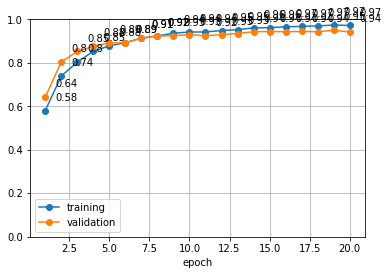

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import datetime

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

training_accuracies = []
validation_accuracies = []

def plot_with_labels(data, label):
    xes = list(range(1, len(data)+1))
    plt.plot(xes, data, label=label, marker='o')
    plt.ylim(0,1)
    #plt.xlim(1,len(data)+1)
    plt.legend()
    for index,data_value in zip(xes, data):
        plt.annotate(str(round(data_value,2)), xy=(index, data_value), xytext=(10,10), textcoords='offset points')
        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_actual)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_actual, y_train = shuffle(X_train_actual, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_actual[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(X_train_actual, y_train)
        validation_accuracy = evaluate(X_valid_actual, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training, Validation Accuracy = {:.3f} {:.3f}".format(training_accuracy, validation_accuracy))
        print()
        training_accuracies.append(training_accuracy)
        validation_accuracies.append(validation_accuracy)
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    print(datetime.datetime.now())
    print("training_accuracies=", training_accuracies)
    print("validation_accuracies=", validation_accuracies)
    print("final_training_accuracy=  ", round(training_accuracy,2))
    print("final_validation_accuracy=", round(validation_accuracy,2))


    plot_with_labels(training_accuracies, "training")
    plot_with_labels(validation_accuracies, "validation")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.show()

### Test the model

In [7]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_actual, y_test)
    print("Test_Accuracy = {:.3f}".format(test_accuracy))

Test_Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

0 work-and-speed-30.png 1
1 caution.png 18
2 elderly-crossing.png -1
3 right-of-way.png 11
4 caution-1.png 18
5 Do-Not-Enter.png 17
6 Arterial-priority.png 12
7 speed-100.png 7
8 stop.png 14
9 speed-130.png -1


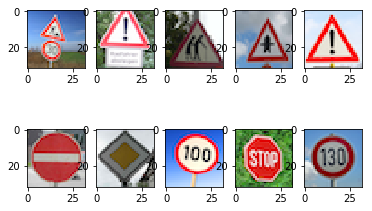

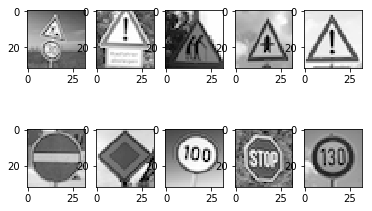

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib
import matplotlib.image as mpimg
import math

file_dir = "images-from-the-web"

file_class_mapping = { 
    "Arterial-priority.png": 12,
    "right-of-way.png": 11,
    "Do-Not-Enter.png": 17,
    "caution.png" : 18,
    "caution-1.png" : 18,
    "stop.png": 14,
    "speed-100.png": 7,
    "work-and-speed-30.png": 1,
    "elderly-crossing.png": -1,
    "speed-130.png": -1,
}

found_images = np.empty((len(file_class_mapping), 32, 32, 3), dtype=np.uint8)
found_images_y = []

num_cols = 5
num_rows = math.ceil(len(file_class_mapping)/num_cols)
subplot_setup(num_cols, num_rows)

for index, (filename, class_number) in enumerate(file_class_mapping.items()):
    print(index, filename, class_number)
    found_images[index] = cv2.imread(file_dir + "/" + filename, cv2.IMREAD_COLOR)
    found_images[index] = cv2.cvtColor(found_images[index], cv2.COLOR_BGR2RGB)
    found_images_y.append(class_number)
    subplot_next(found_images[index])

plt.show()

found_images_gray = convert_to_gray(found_images)

# Poor-man's normalization.
found_images_gray = (found_images_gray-128)/128

subplot_setup(num_cols, num_rows)

for image in found_images_gray:
    subplot_next(image)

plt.show()

### Predict the Sign Type for Each Image

In [52]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(found_images_gray, found_images_y)
    print("Test_Accuracy = {:.3f}".format(test_accuracy))

Test_Accuracy = 0.500


### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

web_images_accuracy = 0.5 # 50%

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  3.76460344e-01,   2.88034588e-01,   9.13818106e-02,
          3.69247422e-02,   2.92300489e-02],
       [  6.17525697e-01,   2.84472108e-01,   6.51231781e-02,
          1.01023158e-02,   9.36335418e-03],
       [  7.11113930e-01,   1.30455583e-01,   7.61411116e-02,
          4.97319587e-02,   2.01288182e-02],
       [  1.00000000e+00,   7.73129390e-12,   1.96268904e-13,
          4.24240314e-14,   4.07606899e-21],
       [  1.00000000e+00,   7.97082626e-12,   5.50257265e-22,
          4.07867998e-22,   2.36604668e-24],
       [  1.00000000e+00,   9.12670750e-14,   1.91398805e-15,
          4.26118082e-16,   2.82283603e-16],
       [  9.98823345e-01,   1.09686865e-03,   6.38832425e-05,
          1.39089743e-05,   1.70110968e-06],
       [  5.14774740e-01,   2.19667152e-01,   1.06353186e-01,
          6.32037148e-02,   4.70955670e-02],
       [  9.99999285e-01,   4.60408813e-07,   2.77045075e-07,
          6.53231104e-13,   4.49113068e-16],
       [  7.25390971e-0

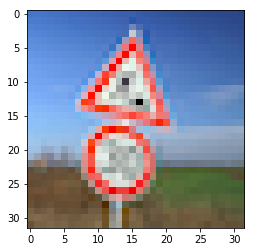

Image class 30: 37.646%
Image class 25: 28.803%
Image class 24: 9.138%
Image class 40: 3.692%
Image class 28: 2.923%
---------------------------------------------------------------------------
Image index 1 should be class:18


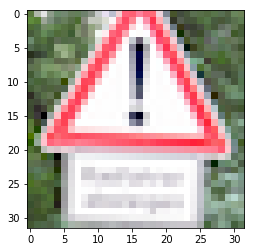

Image class 29: 61.753%
Image class 30: 28.447%
Image class 28: 6.512%
Image class 21: 1.010%
Image class 22: 0.936%
---------------------------------------------------------------------------
Image index 2 should be class:-1


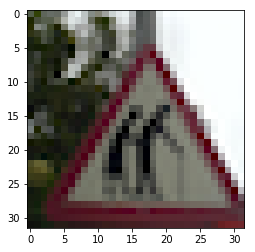

Image class 27: 71.111%
Image class 24: 13.046%
Image class 28: 7.614%
Image class 18: 4.973%
Image class 26: 2.013%
---------------------------------------------------------------------------
Image index 3 should be class:11


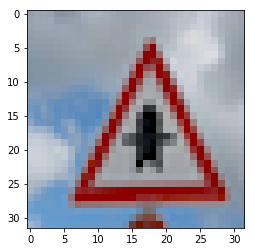

Image class 11: 100.000%
Image class 21: 0.000%
Image class 30: 0.000%
Image class 31: 0.000%
Image class 39: 0.000%
---------------------------------------------------------------------------
Image index 4 should be class:18


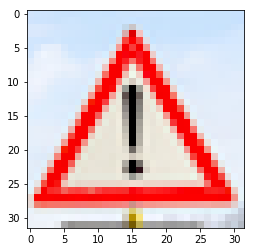

Image class 18: 100.000%
Image class 26: 0.000%
Image class 1: 0.000%
Image class 27: 0.000%
Image class 24: 0.000%
---------------------------------------------------------------------------
Image index 5 should be class:17


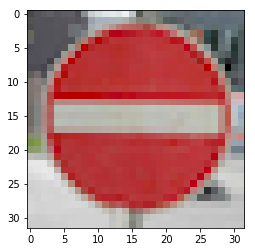

Image class 17: 100.000%
Image class 14: 0.000%
Image class 40: 0.000%
Image class 20: 0.000%
Image class 16: 0.000%
---------------------------------------------------------------------------
Image index 6 should be class:12


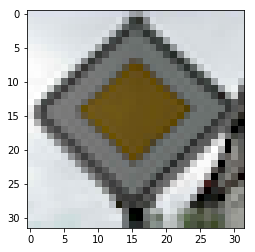

Image class 12: 99.882%
Image class 14: 0.110%
Image class 15: 0.006%
Image class 41: 0.001%
Image class 40: 0.000%
---------------------------------------------------------------------------
Image index 7 should be class:7


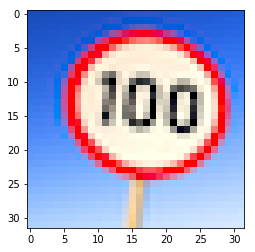

Image class 5: 51.477%
Image class 31: 21.967%
Image class 1: 10.635%
Image class 2: 6.320%
Image class 3: 4.710%
---------------------------------------------------------------------------
Image index 8 should be class:14


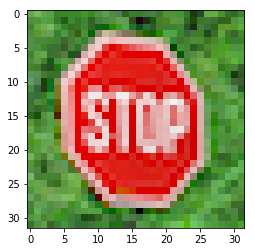

Image class 14: 100.000%
Image class 8: 0.000%
Image class 15: 0.000%
Image class 38: 0.000%
Image class 0: 0.000%
---------------------------------------------------------------------------
Image index 9 should be class:-1


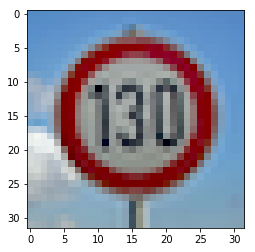

Image class 2: 72.539%
Image class 8: 21.616%
Image class 0: 5.589%
Image class 3: 0.165%
Image class 40: 0.088%


In [53]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def show_web_image(index):
    image = found_images[index]
    plt.figure()
    plt.imshow(image.squeeze(), cmap='gray')
    plt.show()
    
softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    softmax_out = sess.run(softmax, feed_dict={x: found_images_gray, keep_prob: 0.5})

    top_k = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x: found_images_gray, keep_prob: 0.5})
    
print(top_k)
print(top_k.values.shape)
    
for index, (percentages, class_numbers) in enumerate(zip(top_k.values, top_k.indices)):
    print("---------------------------------------------------------------------------")
    print("Image index {} should be class:{}".format(index, found_images_y[index]))
    show_web_image(index)
    for (certainty, class_number) in zip(percentages, class_numbers):
        pct = certainty * 100
        print("Image class {}: {:02.3f}%".format(class_number, pct))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")